# Laboratorio 2: Armado de un esquema de aprendizaje automático

Estudiante: Mariano Martín Gualpa (mgualpa@gmail.com)

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [12]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta

from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ml.visualization import plot_confusion_matrix, classifier_boundary
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

%matplotlib inline

np.random.seed(0)  # Para mayor determinismo

Parametros generales de trabajo:

In [13]:
fileName = "./data/loan_data.csv"
trainPercent = 0.70
valPercent = 0.20
testPercent = 0.10


## Carga de datos

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [14]:
dataset = pd.read_csv(fileName, comment="#")
display(dataset.head())
countRows = len(dataset) 
print("Cantidad total de registros del dataset: ", countRows)
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


Cantidad total de registros del dataset:  1854


## Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o *training*) y evaluación (o *test*).

El primero será utilizado para la creación/selección del modelo de clasificación. El segundo se utilizará sólo al final (una vez elegidos los mejores hiperparámetros) para ver cuál es el resultado final del modelo sobre un conjunto de datos independiente.

En el diseño de este trabajo, se decide utilizar:
* 70% para entrenamiento.
* 20% para validación.
* 10% para evaluación.


In [15]:
# TODO: Dividir en datos de entrenamiento y evaluación
trainCount = int(round(countRows * trainPercent))
valCount = int(round(countRows * valPercent))
testCount = countRows - trainCount - valCount
print("Tamaños previstos para entrenamiento {}, validación {} y evaluación {}".format(trainCount, valCount, testCount))

shuff_data = np.random.permutation(countRows)

shuff_train = shuff_data[ : trainCount]
shuff_val = shuff_data[trainCount : trainCount + valCount]
shuff_test = shuff_data[trainCount + valCount : ]
print("Tamaños de conjuntos para entrenamiento {}, validación {} y evaluación {}".format(len(shuff_train), len(shuff_val), len(shuff_test)))

X_train = X.iloc[shuff_train,:]
X_val = X.iloc[shuff_val,:]
X_test = X.iloc[shuff_test,:]

y_train = y[shuff_train]
y_val = y[shuff_val]
y_test = y[shuff_test]

print("Tamaños de conjuntos obtenidos de entrenamiento {}, validación {} y evaluación {}".format(len(X_train), len(X_val), len(X_test)))


Tamaños previstos para entrenamiento 1298, validación 371 y evaluación 185
Tamaños de conjuntos para entrenamiento 1298, validación 371 y evaluación 185
Tamaños de conjuntos obtenidos de entrenamiento 1298, validación 371 y evaluación 185


## Ejercicio 2: Elección de un modelo

Basándose en lo visto en el teórico escojan y justifiquen un modelo de aprendizaje automático. Recuerden que los pasos para elegir un modelo son:



### Selección de hipótesis

La hipótesis de trabajo es que se trata de un problema de clasidicación y que los atributos disponibles en el dataset permitirán predecir con una probabilidad de error razonable si el atributo objetivo TARGET será 1 (el prestamo no será pagado).

### Selección de regularizador

*TODO*



### Selección de función de coste

*TODO*



### Justificación de las selecciones

*TODO*

## Ejercicio 3: Selección de hiperparámetros

Utilizando búsqueda exhaustiva (*grid search*) con *5-fold cross-validation* y utilizando como métrica el área bajo la curva de ROC (o *ROC-AUC*), hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.834 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.834 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.680 (+/-0.068) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.834 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.701 (+/-0.071) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.832 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.0

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.810 (+/-0.001) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.475 (+/-0.092) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.676 (+/-0.068) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.699 (+/-0.071) para los parámetros {'alpha': 0.001, 'eta0': 0.01,

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.700 (+/-0.072) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.572 (+/-0.104) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.692 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.702 (+/-0.067) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.707 (+/-0.064) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.687 (+/-0.068) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.448 (+/-0.098) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.742 (+/-0.034) para los parámetros {'alpha': 0.001, 'eta

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


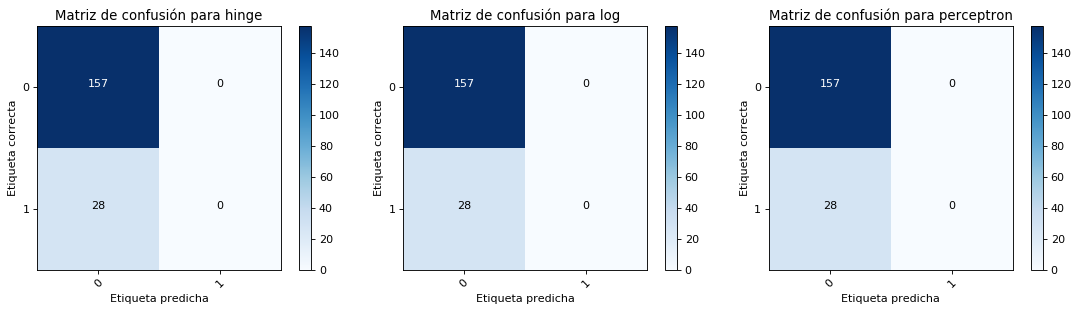

In [22]:
# TODO: Selección de hiperparámetros


plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=[0, 1], title="Matriz de confusión para %s" % loss)

## Ejercicio 4: Métricas sobre el conjunto de evaluación

Una vez encontrados los mejores hiperparámetros para el modelo seleccionado en los apartados anteriores se evalúa el modelo final entrenado sobre el conjunto de datos de evaluación seleccionado en el ejercicio 1. Pueden utilizar las métricas que crean convenientes. Es mejor utilizar más de una métrica. Particularmente el *reporte de clasificación* y la *matriz de confusión* son buenos ejemplos de métricas.

In [ ]:
# TODO: Evaluación del modelo

## Ejercicio 5 (opcional): Curvas de ROC

Como ejercicio adicional (opcional), pueden redefinir el umbral de decisión óptimo del problema a partir de los resultados que muestren curvas de ROC como justificación. 

Pueden ver esto mediante la [graficación de las curvas de ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). En el link que se les brinda se muestra como hacer para graficar curvas de ROC para problemas multiclase. Sin embargo se puede adaptar fácilmente a un problema binario obviando la parte donde se calcula la curva clase por clase.

In [ ]:
# TODO: Redefinir umbral de clasificación a través de los resultados vistos por graficar curvas de ROC